In [1]:
import numpy as np
import matplotlib.pyplot as plt
# matplolib inline
from sklearn.datasets import fetch_openml

In [2]:
mnist= fetch_openml('mnist_784', version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
mnist.data = mnist.data.to_numpy()
mnist.target = mnist.target.to_numpy()

In [5]:
mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
mnist.data[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [7]:
mnist.target[0]

'5'

In [8]:
mnist.target = mnist.target.astype(np.int8)

In [9]:
mnist.target[0]

5

In [10]:
X = mnist.data / 255 # 0~255 값으로 정규화
y = mnist.target

In [11]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
y[0]

5

이 이미지 데이터의 레이블은 5이다.


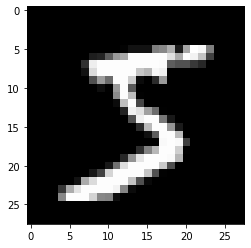

In [13]:
plt.imshow(X[0].reshape(28,28), cmap='gray')
print("이 이미지 데이터의 레이블은 {:.0f}이다.".format(y[0]))

In [14]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


"""X_train = X_train.type(torch.LongTensor)
X_test = X_test.type(torch.LongTensor)
y_train = y_train.type(torch.LongTensor)
y_test = y_test.type(torch.LongTensor)"""

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size = 64, shuffle = True)
loader_test = DataLoader(ds_test, batch_size = 64, shuffle = False)

In [16]:
X_train.type()

'torch.FloatTensor'

# 다층 퍼셉트론 mlp

In [17]:
from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 100))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=100, bias=True)
)


In [18]:
from torch import optim

# 오차함수 선택
loss_fn = nn.CrossEntropyLoss()

# 최적화 기법- Adam
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [19]:
def train(epoch):
    model.train()  # 신경망을 학습 모드로 전환

    # 데이터로더에서 미니배치를 하나씩 꺼내 학습을 수행
    for data, targets in loader_train:

        optimizer.zero_grad()  # 경사를 0으로 초기화
        outputs = model(data)  # 데이터를 입력하고 출력을 계산
        loss = loss_fn(outputs, targets)  # 출력과 훈련 데이터 정답 간의 오차를 계산
        loss.backward()  # 오차를 역전파 계산
        optimizer.step()  # 역전파 계산한 값으로 가중치를 수정

    print("epoch{}：완료\n".format(epoch))

In [20]:
def test():
    model.eval()  # 신경망을 추론 모드로 전환
    correct = 0

    # 데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
    with torch.no_grad():  # 추론 과정에는 미분이 필요없음
        for data, targets in loader_test:

            outputs = model(data)  # 데이터를 입력하고 출력을 계산

            # 추론 계산
            _, predicted = torch.max(outputs.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산
            correct += predicted.eq(targets.data.view_as(predicted)).sum()  # 정답과 일치한 경우 정답 카운트를 증가

    # 정확도 출력
    data_num = len(loader_test.dataset)  # 데이터 총 건수
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))

In [21]:
test()


테스트 데이터에서 예측 정확도: 0/10000 (0%)



In [22]:
for epoch in range(3):
    train(epoch)

test()

epoch0：완료

epoch1：완료

epoch2：완료


테스트 데이터에서 예측 정확도: 9582/10000 (96%)



예측 결과 : 2
이 이미지 데이터의 정답 레이블은 2입니다.


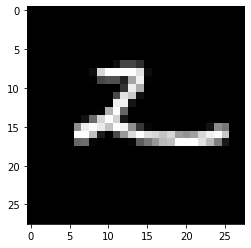

In [25]:
index = 2022

model.eval()
data = X_test[index]
output = model(data)
_, predicted = torch.max(output.data, 0)

print("예측 결과 : {}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28,28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다.".format(y_test[index]))

In [26]:
output

tensor([  0.4181,  -3.1097,   9.9779,   1.9237,   3.6531,  -0.3071,   1.4262,
          2.8102,  -0.1415,  -1.2691, -19.0215, -23.7237, -22.1116, -18.2698,
        -20.5615, -19.4333, -20.8270, -23.5128, -19.8279, -17.1120, -22.2788,
        -21.5765, -22.2574, -21.5996, -20.5418, -18.9890, -23.3458, -20.4033,
        -19.9076, -23.5115, -19.0540, -19.7461, -18.7335, -20.0748, -22.6530,
        -21.9922, -23.4704, -22.4994, -19.0571, -22.8606, -21.0585, -22.1847,
        -19.5561, -20.1640, -19.5055, -22.6326, -21.4702, -20.6249, -19.8176,
        -17.9104, -19.9629, -23.1616, -18.2020, -20.0004, -21.3589, -19.7470,
        -18.1017, -20.9820, -19.6236, -19.4142, -19.3527, -20.6033, -21.4526,
        -22.3615, -21.6012, -23.3515, -16.9864, -20.4988, -23.2858, -24.3433,
        -20.2905, -19.0169, -20.6757, -18.6295, -18.1324, -20.8692, -22.2408,
        -25.5690, -18.4272, -22.9741, -21.3047, -19.8486, -21.3020, -18.6750,
        -22.1379, -23.3803, -21.0882, -20.8559, -21.1453, -17.10